In [1]:
import pandas as pd
import numpy as np
from tqdm import notebook as nb
import pickle
import matplotlib.pyplot as plt

In [81]:
df_85 = pd.read_csv('data/X_85_v2.csv')
df_26 = pd.read_csv('data/X_26_v2.csv')


In [82]:
df_85 = df_85[df_85['sur']==1]
df_26 = df_26[df_26['sur']==1]

In [83]:
df_26.columns

Index(['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'year', 'lat', 'lon', 'region', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur'],
      dtype='object')

In [84]:
df_26 = df_26[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]
df_85 = df_85[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]

df_85

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,bio19,lat,lon,atacama,arica,serena,santiago,maule,norte,sur
0,8.604336,9.628532,39.735141,493.578857,22.608087,-1.623694,24.231781,6.552596,14.717778,14.717778,...,1916.066643,-36.500000,-71.349998,0,0,0,0,1,0,1
1,7.559607,9.783966,40.143670,495.916737,21.752740,-2.619635,24.372375,5.538263,13.680607,13.680607,...,1678.198732,-36.500000,-71.260002,0,0,0,0,1,0,1
2,5.988039,11.066032,40.407241,526.463538,22.736017,-4.650244,27.386261,3.804183,12.465397,12.527653,...,1166.886281,-36.500000,-70.989998,0,0,0,0,1,0,1
3,5.638094,10.678490,39.351987,524.183449,22.303522,-4.832312,27.135834,3.504806,12.020970,12.152755,...,1044.623568,-36.500000,-70.900002,0,0,0,0,1,0,1
4,12.945553,11.132871,41.568652,465.571690,29.855920,3.074030,26.781891,10.602502,19.140690,19.140690,...,1472.451711,-36.410000,-71.620003,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115050,12.726320,10.758611,57.833815,288.804759,24.265833,5.663202,18.602631,10.564457,13.639154,16.470046,...,108.910724,-29.209999,-70.629997,0,0,1,0,0,0,1
115051,9.162472,10.431076,55.046550,309.069043,21.272241,2.322687,18.949554,6.916915,10.001927,13.207737,...,178.415808,-29.209999,-70.540001,0,0,1,0,0,0,1
115052,16.332992,11.028046,57.080058,296.620447,28.523553,9.203241,19.320312,13.377822,19.144301,20.141819,...,67.521277,-29.120001,-70.720001,0,0,1,0,0,0,1
115053,13.777327,10.899142,57.877052,295.504338,25.521936,6.690393,18.831543,11.571537,14.742822,17.612777,...,105.183191,-29.120001,-70.629997,0,0,1,0,0,0,1


In [85]:
X_85 = df_85.values
X_26 = df_26.values

In [86]:
filehandler = open('c_soil.obj', 'rb') 
c_soil = pickle.load(filehandler)

filehandler = open('c_plant.obj', 'rb') 
c_plant = pickle.load(filehandler)

In [87]:
y_c_soil_85 = c_soil.predict(X_85)
y_c_soil_26 = c_soil.predict(X_26)

y_c_plant_85 = c_plant.predict(X_85)
y_c_plant_26 = c_plant.predict(X_26)

In [13]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [89]:
y_list=[]
for y in y_c_soil_85, y_c_soil_26, y_c_plant_85, y_c_plant_26:
    y_mean = np.split(y[0], 44)
    y_std = np.split(y[1], 44)
    y_mean = moving_average(np.median(y_mean, axis=1),n=10)
    y_std = moving_average(np.mean(y_std, axis=1),n=10)
    y_list.append((y_mean, y_std))

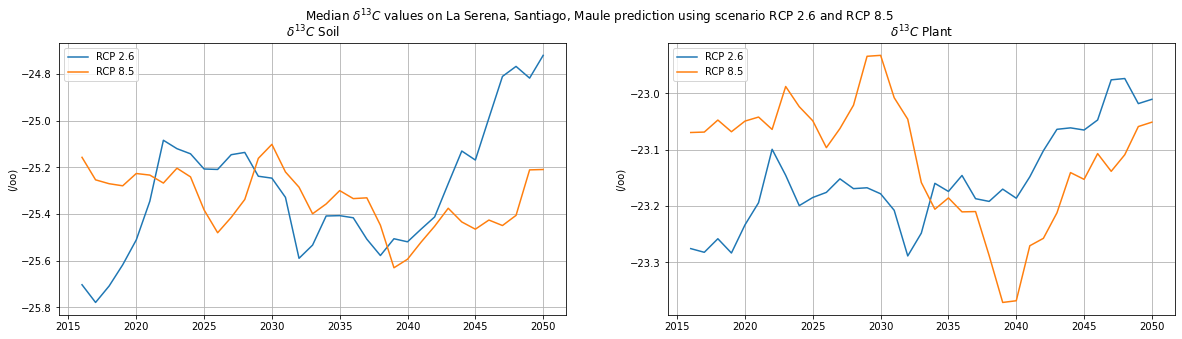

In [90]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,5)
fig.suptitle('Median $\delta^{13}C$ values on La Serena, Santiago, Maule prediction using scenario RCP 2.6 and RCP 8.5')

time_list=list(range(2016,2051))
ax[0].plot(time_list, y_list[1][0], label = 'RCP 2.6')
ax[0].plot(time_list, y_list[0][0], label = 'RCP 8.5')
ax[0].set_ylabel('(/oo)')
ax[0].set_title('$\delta^{13}C$ Soil')
ax[0].grid()
ax[0].legend()

#ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)

ax[1].plot(time_list, y_list[3][0], label = 'RCP 2.6')
ax[1].plot(time_list, y_list[2][0], label = 'RCP 8.5')
ax[1].set_ylabel('(/oo)')
ax[1].set_title('$\delta^{13}C$ Plant')
ax[1].grid()
ax[1].legend()
#ax[0,1].fill_between(time_list, y_list[0][0] - y_list[0][1], y_list[0][0] + y_list[0][1], color='gray', alpha=0.2)





#plt.savefig('Sur_median_v2.png')

## Modelo unificado

In [2]:
df_85 = pd.read_csv('data/X_85.csv')
df_26 = pd.read_csv('data/X_26.csv')

In [3]:
filehandler = open('modelAll.obj', 'rb') 
modelAll = pickle.load(filehandler)

In [76]:
cluster = 'atacama'

df_85 = df_85[df_85['sur']==1]
df_26 = df_26[df_26['sur']==1]

In [77]:
df_26 = df_26[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]
df_85 = df_85[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]

In [78]:
X_85_plant_c = df_85.values
X_26_plant_c = df_26.values
X_85_soil_c = df_85.values
X_26_soil_c = df_26.values

X_85_plant_n = df_85.values
X_26_plant_n = df_26.values
X_85_soil_n = df_85.values
X_26_soil_n = df_26.values

In [79]:
_1 = np.full(len(X_85_plant_c), 1)
_0 = np.full(len(X_85_plant_c), 0)

b_plant_n = np.array([_0, _1, _1, _0])
b_plant_c = np.array([_0, _1, _0, _1])
b_soil_n = np.array([_1, _0, _1, _0])
b_soil_c = np.array([_1, _0, _0, _1])

In [80]:
X_85_plant_n = np.concatenate((X_85_plant_n, b_plant_n.T), axis=1)
X_26_plant_n = np.concatenate((X_26_plant_n, b_plant_n.T), axis=1)
X_85_soil_c  = np.concatenate((X_85_soil_c, b_soil_c.T), axis=1)
X_26_soil_c = np.concatenate((X_26_soil_c, b_soil_c.T), axis=1)

X_85_plant_c = np.concatenate((X_85_plant_c, b_plant_c.T), axis=1)
X_26_plant_c = np.concatenate((X_26_plant_c, b_plant_c.T), axis=1)
X_85_soil_n = np.concatenate((X_85_soil_n, b_soil_n.T), axis=1)
X_26_soil_n = np.concatenate((X_26_soil_n, b_soil_n.T), axis=1)


In [81]:
X_26_plant_c[0]

array([ 8.76938782e+00,  9.28358205e+00,  4.00498202e+01,  4.13671522e+02,
        2.35324646e+01,  3.52380371e-01,  2.31800842e+01,  4.57565715e+00,
        1.46093587e+01,  1.46093587e+01,  4.12639771e+00,  3.07148463e+03,
        6.10708214e+02,  1.30445883e+01,  8.35754434e+01,  1.60407892e+03,
        1.53360448e+02,  1.53360448e+02,  1.52637479e+03, -3.65000000e+01,
       -7.13499985e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  1.00000000e+00])

In [82]:
y_c_soil_85 = modelAll.predict(X_85_soil_c)
y_c_soil_26 = modelAll.predict(X_26_soil_c)

y_c_plant_85 = modelAll.predict(X_85_plant_c)
y_c_plant_26 = modelAll.predict(X_26_plant_c)

y_n_soil_85 = modelAll.predict(X_85_soil_n)
y_n_soil_26 = modelAll.predict(X_26_soil_n)

y_n_plant_85 = modelAll.predict(X_85_plant_n)
y_n_plant_26 = modelAll.predict(X_26_plant_n)

In [83]:
np.shape(df_85_plant_c.values)

(61996, 30)

In [21]:
y_list=[]
for y in y_c_soil_85, y_c_soil_26, y_c_plant_85, y_c_plant_26, y_n_soil_85, y_n_soil_26, y_n_plant_85, y_n_plant_26:
    y_mean = np.split(y[0], 44)
    y_std = np.split(y[1], 44)
    y_mean = moving_average(np.median(y_mean, axis=1),n=10)
    y_std = moving_average(np.mean(y_std, axis=1),n=10)
    y_list.append((y_mean, y_std))
    

AttributeError: 'tuple' object has no attribute 'shape'

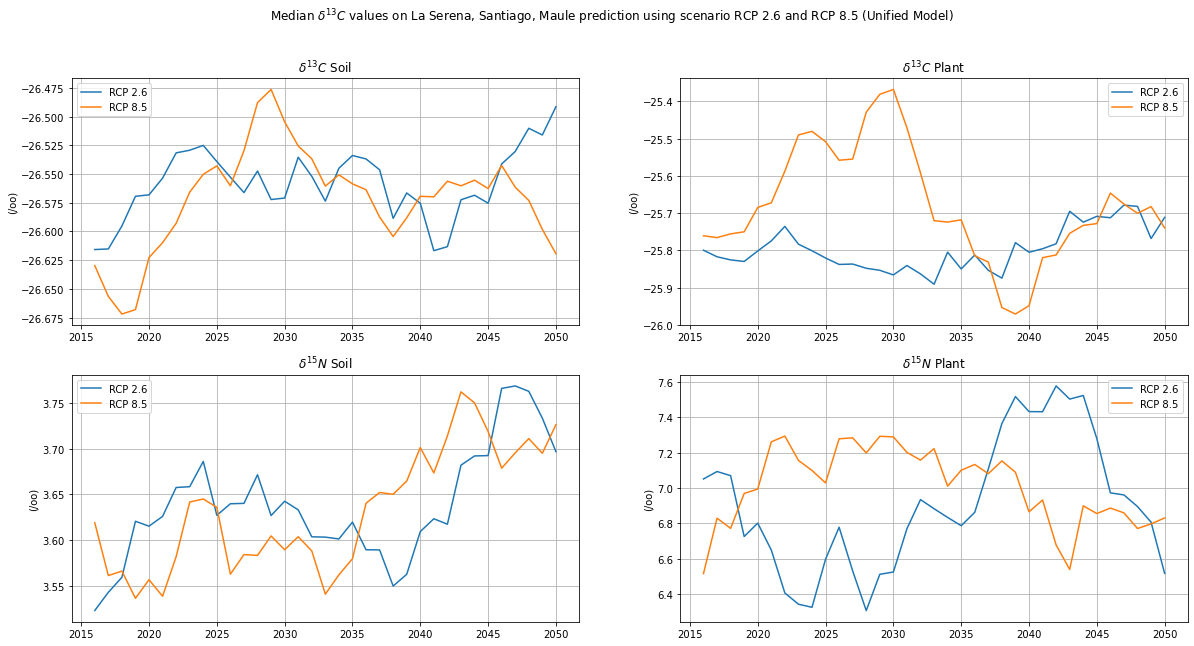

In [87]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,10)
fig.suptitle('Median $\delta^{13}C$ values on La Serena, Santiago, Maule prediction using scenario RCP 2.6 and RCP 8.5 (Unified Model)')

time_list=list(range(2016,2051))
ax[0,0].plot(time_list, y_list[1][0], label = 'RCP 2.6')
#ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)
ax[0,0].plot(time_list, y_list[0][0], label = 'RCP 8.5')
ax[0,0].set_ylabel('(/oo)')
ax[0,0].set_title('$\delta^{13}C$ Soil')
ax[0,0].grid()
ax[0,0].legend()

#ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)

ax[0,1].plot(time_list, y_list[3][0], label = 'RCP 2.6')
ax[0,1].plot(time_list, y_list[2][0], label = 'RCP 8.5')
ax[0,1].set_ylabel('(/oo)')
ax[0,1].set_title('$\delta^{13}C$ Plant')
ax[0,1].grid()
ax[0,1].legend()
#ax[0,1].fill_between(time_list, y_list[0][0] - y_list[0][1], y_list[0][0] + y_list[0][1], color='gray', alpha=0.2)

ax[1,0].plot(time_list, y_list[5][0], label = 'RCP 2.6')
ax[1,0].plot(time_list, y_list[4][0], label = 'RCP 8.5')
ax[1,0].set_ylabel('(/oo)')
ax[1,0].set_title('$\delta^{15}N$ Soil')
ax[1,0].grid()
ax[1,0].legend()

#ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)

ax[1,1].plot(time_list, y_list[7][0], label = 'RCP 2.6')
ax[1,1].plot(time_list, y_list[6][0], label = 'RCP 8.5')
ax[1,1].set_ylabel('(/oo)')
ax[1,1].set_title('$\delta^{15}N$ Plant')
ax[1,1].grid()
ax[1,1].legend()
#ax[0,1].fill_between(time_list, y_list[0][0] - y_list[0][1], y_list[0][0] + y_list[0][1], color='gray', alpha=0.2)


plt.savefig('Sur_median_v3.png')

# Diferente Pesos

In [18]:
df_85 = pd.read_csv('data/X_85_v2.csv')
df_26 = pd.read_csv('data/X_26_v2.csv')

In [19]:
filehandler = open('model_dif_grad.obj', 'rb') 
modelAll = pickle.load(filehandler)

In [20]:
cluster = 'sur'

df_85 = df_85[df_85[cluster]==1]
df_26 = df_26[df_26[cluster]==1]

In [21]:
df_26 = df_26[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]
df_85 = df_85[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'lat', 'lon', 'atacama', 'arica',
       'serena', 'santiago', 'maule', 'norte', 'sur']]

In [22]:
#df_85 

In [23]:
X_85_plant_c = df_85.values
X_26_plant_c = df_26.values
X_85_soil_c = df_85.values
X_26_soil_c = df_26.values

X_85_plant_n = df_85.values
X_26_plant_n = df_26.values
X_85_soil_n = df_85.values
X_26_soil_n = df_26.values

In [24]:
np.shape(X_26_soil_n[:,19:28])


(46728, 9)

In [25]:
_1 = np.full(len(X_85_plant_c), 1)
_0 = np.full(len(X_85_plant_c), 0)

b_plant_n = np.array([_0, _1, _1, _0])
b_plant_c = np.array([_0, _1, _0, _1])
b_soil_n = np.array([_1, _0, _1, _0])
b_soil_c = np.array([_1, _0, _0, _1])

In [26]:
X_85_plant_n = np.concatenate((X_85_plant_n, b_plant_n.T), axis=1)
X_26_plant_n = np.concatenate((X_26_plant_n, b_plant_n.T), axis=1)
X_85_soil_c  = np.concatenate((X_85_soil_c, b_soil_c.T), axis=1)
X_26_soil_c = np.concatenate((X_26_soil_c, b_soil_c.T), axis=1)

X_85_plant_c = np.concatenate((X_85_plant_c, b_plant_c.T), axis=1)
X_26_plant_c = np.concatenate((X_26_plant_c, b_plant_c.T), axis=1)
X_85_soil_n = np.concatenate((X_85_soil_n, b_soil_n.T), axis=1)
X_26_soil_n = np.concatenate((X_26_soil_n, b_soil_n.T), axis=1)


In [27]:
#X_85_soil_c

In [28]:
y_c_soil_85,  y_c_soil_26,  y_c_plant_85, y_c_plant_26,  y_n_soil_85,  y_n_soil_26,  y_n_plant_85, y_n_plant_26 = [],[],[],[],[],[],[],[]

for i in [0.7, 0.4, 0.1]:
    y_c_soil_85.append(modelAll.predict(X_85_soil_c, i))
    y_c_soil_26.append(modelAll.predict(X_26_soil_c, i))

    y_c_plant_85.append(modelAll.predict(X_85_plant_c, i))
    y_c_plant_26.append(modelAll.predict(X_26_plant_c, i))

    y_n_soil_85.append(modelAll.predict(X_85_soil_n, i))
    y_n_soil_26.append(modelAll.predict(X_26_soil_n, i))

    y_n_plant_85.append(modelAll.predict(X_85_plant_n, i))
    y_n_plant_26.append(modelAll.predict(X_26_plant_n, i))

In [29]:
y_list=[]
for y in y_c_soil_85, y_c_soil_26, y_c_plant_85, y_c_plant_26, y_n_soil_85, y_n_soil_26, y_n_plant_85, y_n_plant_26:
    y_=[]
    for i in range(0,3):
        y_mean = y[i][0]
        y_std = y[i][1]
        y_mean = moving_average(np.median(y_mean, axis=1),n=10)
        y_std = moving_average(np.mean(y_std, axis=1),n=10)
        y_.append((y_mean, y_std))
    y_list.append([y_])

In [30]:
np.shape(y_c_soil_85)

(3, 2, 44, 1062)

In [31]:
np.shape(y_list)

(8, 1, 3, 2, 35)

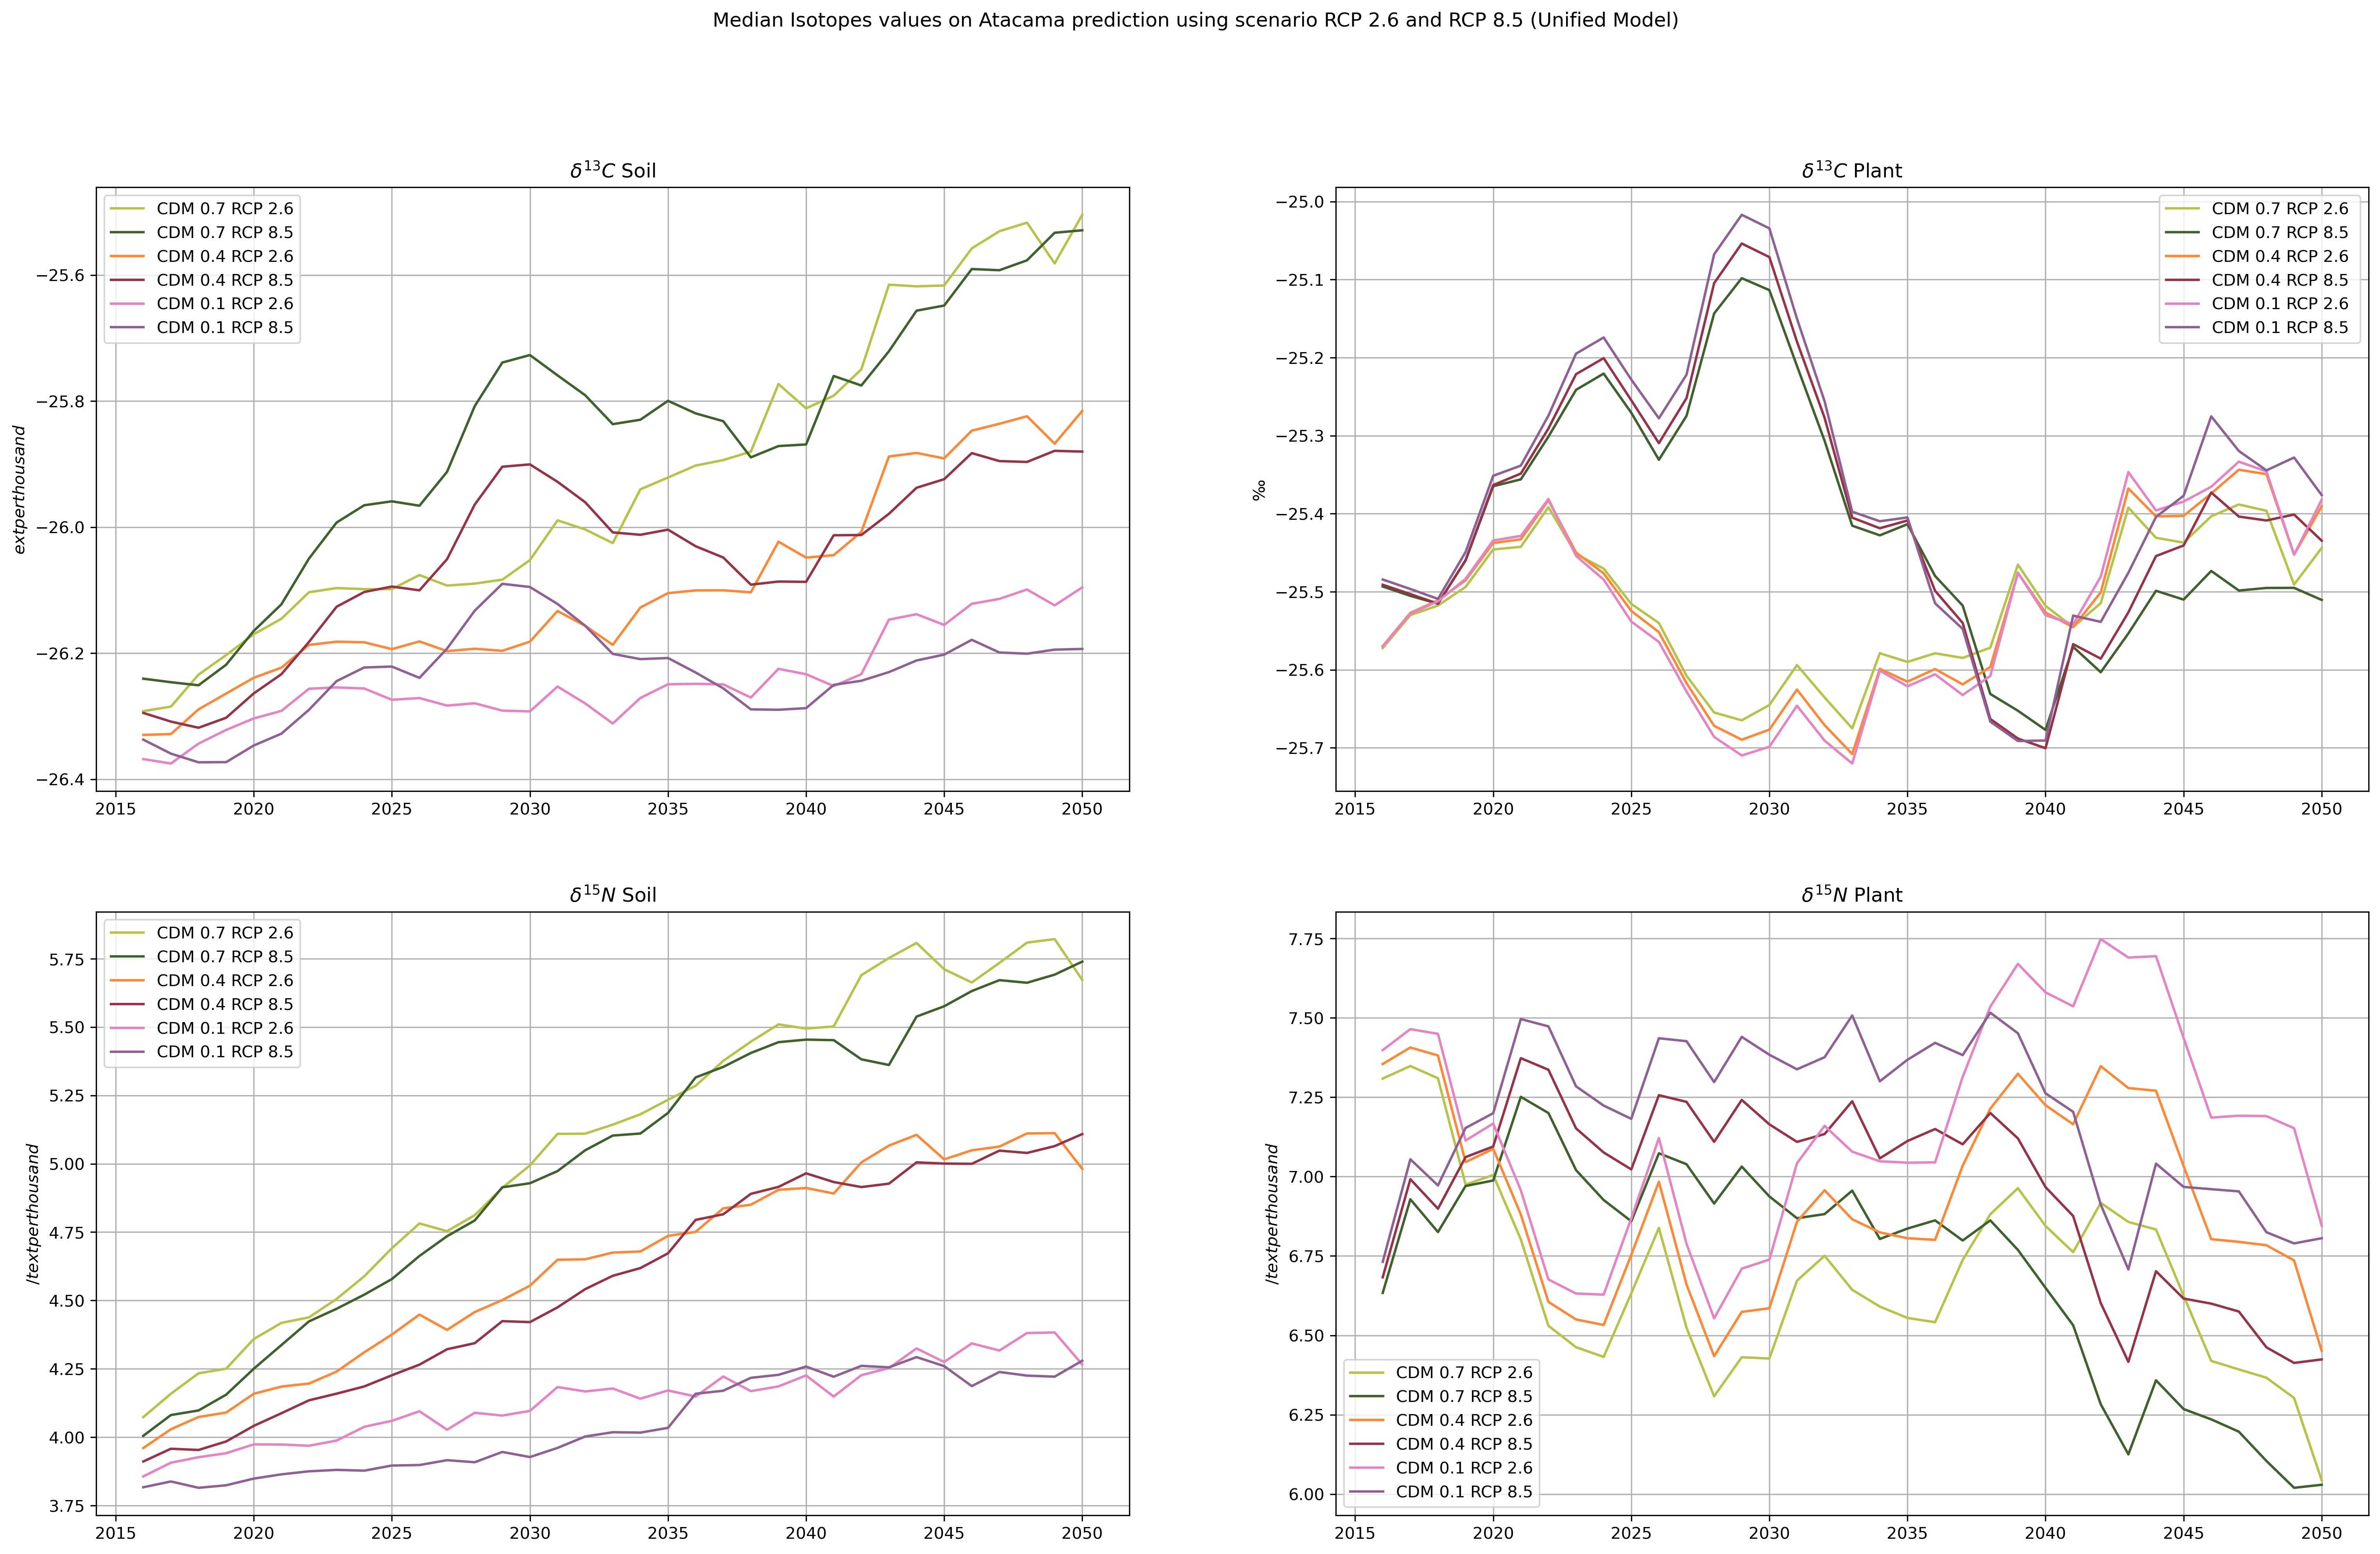

In [32]:
fig, ax = plt.subplots(2,2, figsize=(25, 15), dpi=300)
#fig.set_size_inches(25,15)
fig.suptitle('Median Isotopes values on Atacama prediction using scenario RCP 2.6 and RCP 8.5 (Unified Model)')

time_list=list(range(2016,2051))
colors = [('#b7c348', '#3f612c'), ('#ff8837','#973346'),('#e584c2', '#8e6094')]
models = ['CDM 0.7', 'CDM 0.4', 'CDM 0.1']
for i in range(0,3):
    
    ax[0,0].plot(time_list, y_list[1][0][i][0], label = models[i]+' RCP 2.6', color = colors[i][0])
    #ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)
    ax[0,0].plot(time_list, y_list[0][0][i][0], label = models[i]+' RCP 8.5', color = colors[i][1])
    ax[0,0].set_ylabel('$\textperthousand$')
    ax[0,0].set_title('$\delta^{13}C$ Soil')
    ax[0,0].grid()
    ax[0,0].legend()

    #ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)

    ax[0,1].plot(time_list, y_list[3][0][i][0], label = models[i]+' RCP 2.6 ', color =colors[i][0] )
    ax[0,1].plot(time_list, y_list[2][0][i][0], label = models[i]+' RCP 8.5', color = colors[i][1])
    ax[0,1].set_ylabel('‰')
    ax[0,1].set_title('$\delta^{13}C$ Plant')
    ax[0,1].grid()
    ax[0,1].legend()
    #ax[0,1].fill_between(time_list, y_list[0][0] - y_list[0][1], y_list[0][0] + y_list[0][1], color='gray', alpha=0.2)

    ax[1,0].plot(time_list, y_list[5][0][i][0], label = models[i]+' RCP 2.6', color =colors[i][0])
    ax[1,0].plot(time_list, y_list[4][0][i][0], label = models[i]+' RCP 8.5', color = colors[i][1])
    ax[1,0].set_ylabel('$/textperthousand$')
    ax[1,0].set_title('$\delta^{15}N$ Soil')
    ax[1,0].grid()
    ax[1,0].legend()

    #ax[0,0].fill_between(time_list, y_list[1][0] - y_list[1][1], y_list[1][0] + y_list[1][1], color='gray', alpha=0.2)

    ax[1,1].plot(time_list, y_list[7][0][i][0], label = models[i]+' RCP 2.6', color =colors[i][0])
    ax[1,1].plot(time_list, y_list[6][0][i][0], label = models[i]+' RCP 8.5', color = colors[i][1])
    ax[1,1].set_ylabel('$/textperthousand$')
    ax[1,1].set_title('$\delta^{15}N$ Plant')
    ax[1,1].grid()
    ax[1,1].legend()
    #ax[0,1].fill_between(time_list, y_list[0][0] - y_list[0][1], y_list[0][0] + y_list[0][1], color='gray', alpha=0.2)
plt.savefig('Sur_median_v4.1.png')

[[19 20 21 22 23 24 25 26 27]
 [47 48 49 50 51 52 53 54 55]
 [75 76 77 78 79 80 81 82 83]]


In [37]:
np.shape(list(np.arange(0.0, 1.0, 1/44)))

(44,)